<a href="https://colab.research.google.com/github/ahmedhas32/Data-science-projects/blob/master/Severity_of_air_accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import skew
from collections import OrderedDict
from sklearn import preprocessing


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
import keras
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


Using TensorFlow backend.


In [0]:
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [0]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
from keras import backend as K


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_data=pd.read_csv('/content/drive/My Drive/3c055e822d5b11ea/train.csv')

In [0]:
test_data=pd.read_csv('/content/drive/My Drive/3c055e822d5b11ea/test.csv')

In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [0]:
train_data['Accident_ID'] = train_data['Accident_ID'].astype('object')

In [0]:
train_data['Accident_Type_Code'] = train_data['Accident_Type_Code'].astype('object')

In [0]:
train_data.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [0]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Safety_Score,10000.0,41.876406,16.138072,0.000000,30.593607,41.278539,52.511416,100.000000
Days_Since_Inspection,10000.0,12.931100,3.539803,1.000000,11.000000,13.000000,15.000000,23.000000
Total_Safety_Complaints,10000.0,6.564300,6.971982,0.000000,2.000000,4.000000,9.000000,54.000000
Control_Metric,10000.0,65.145324,11.882934,0.000000,56.927985,65.587967,73.336372,100.000000
Turbulence_In_gforces,10000.0,0.381495,0.121301,0.134000,0.293665,0.365879,0.451346,0.882648
Cabin_Temperature,10000.0,79.969331,2.759739,74.740000,77.960000,79.540000,81.560000,97.510000
Max_Elevation,10000.0,32001.803282,9431.995196,831.695553,25757.636908,32060.336419,38380.641513,64297.651218
Violations,10000.0,2.012200,1.039980,0.000000,1.000000,2.000000,3.000000,5.000000
Adverse_Weather_Metric,10000.0,0.255635,0.381128,0.000316,0.012063,0.074467,0.354059,2.365378


In [0]:
train_data.describe(include=['object']).T

,count,unique,top,freq
Severity,10000,4,Highly_Fatal_And_Damaging,3049
Accident_Type_Code,10000,7,4,2057
Accident_ID,10000,10000,12500,1


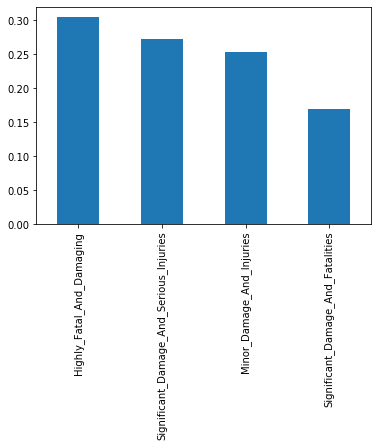

In [0]:
train_data['Severity'].value_counts(normalize=True).plot(kind='bar')

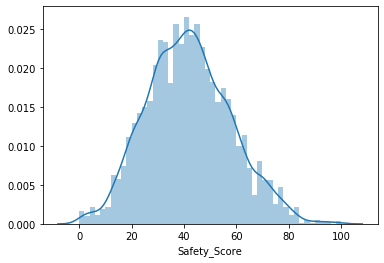

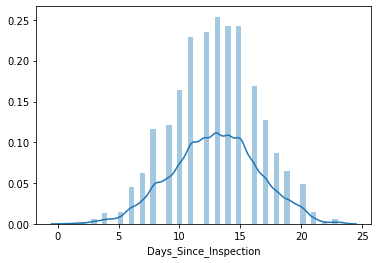

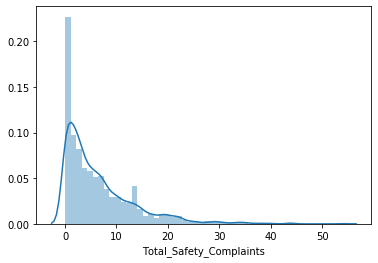

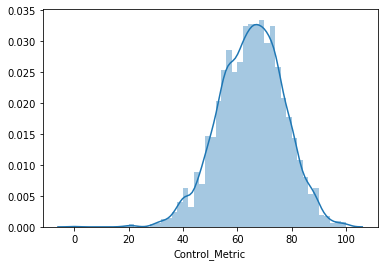

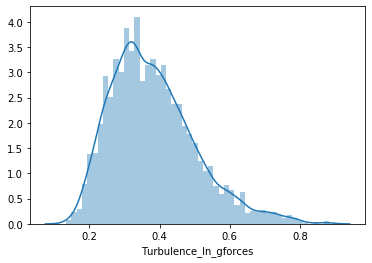

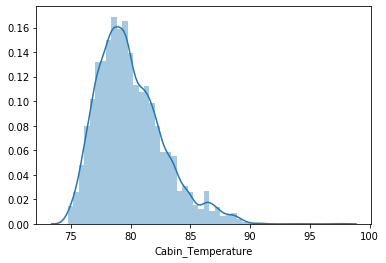

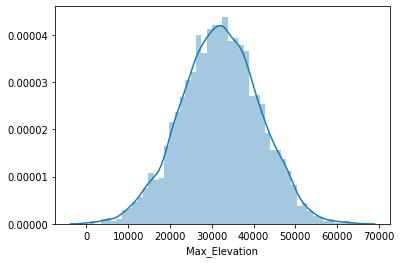

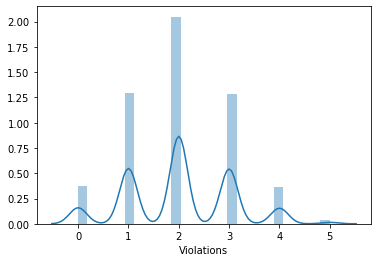

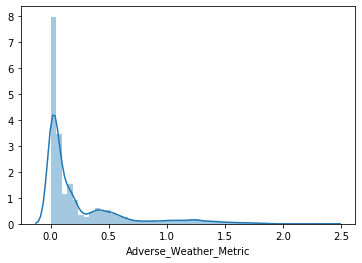

In [0]:
for i in train_data.columns :
  if train_data.dtypes[i] != 'object' :
    sns.distplot(train_data[i])
    plt.show()
  else : 
    continue

Safety_Score               0.43
Days_Since_Inspection      1.40
Total_Safety_Complaints    6.02
Control_Metric             0.59
Turbulence_In_gforces      2.25
Cabin_Temperature          2.34
Max_Elevation              0.83
Violations                 0.00
Adverse_Weather_Metric     9.31
dtype: float64

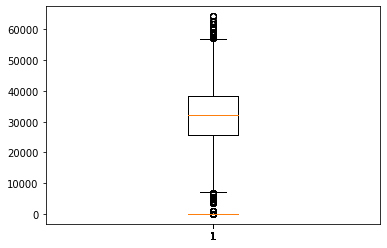

In [0]:
(train_data.select_dtypes(exclude ='object').apply(lambda x: (x >  plt.boxplot(x)['whiskers'][1].get_ydata()[1] ) | (x <  plt.boxplot(x)['whiskers'][0].get_ydata()[1] ) )).mean()*100

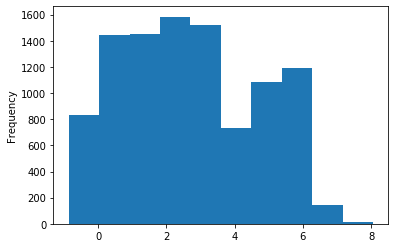

In [0]:
train_data['Adverse_Weather_Metric'].apply(lambda x: -np.log(x)).plot(kind='hist')

In [0]:
train_data['Adverse_Weather_Metric'] = train_data['Adverse_Weather_Metric'].apply(lambda x: -np.log(x))

In [0]:
##(train_data.select_dtypes(exclude ='object').apply(lambda x: (x >  plt.boxplot(x)['whiskers'][1].get_ydata()[1] ) | (x <  plt.boxplot(x)['whiskers'][0].get_ydata()[1] ) )).mean()*100

In [0]:
train_data.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.857192,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,1.043130,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,5.694652,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,1.552452,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,1.732265,9054


In [0]:
train_data.index= train_data['Accident_ID']

In [0]:
train_data_final=pd.get_dummies(data = train_data,columns=['Accident_Type_Code'])

In [0]:
train_data_final

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,Accident_Type_Code_1,Accident_Type_Code_2,Accident_Type_Code_3,Accident_Type_Code_4,Accident_Type_Code_5,Accident_Type_Code_6,Accident_Type_Code_7
Accident_ID,,,,,,,,,,,,,,,,,,
7570,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,31335.476824,3,0.857192,7570,0,1,0,0,0,0,0
12128,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,26024.711057,2,1.043130,12128,0,1,0,0,0,0,0
2181,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,39269.053927,3,5.694652,2181,0,0,0,0,0,0,1
5946,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,42771.499200,1,1.552452,5946,0,0,1,0,0,0,0
9054,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,35509.228515,2,1.732265,9054,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11493,Significant_Damage_And_Serious_Injuries,56.118721,8,1,63.445761,0.482359,78.64,38537.363408,2,3.643924,11493,0,0,0,0,1,0,0
305,Highly_Fatal_And_Damaging,40.365297,10,7,62.169553,0.421775,79.77,40846.916900,2,2.591624,305,0,0,0,1,0,0,0
612,Significant_Damage_And_Serious_Injuries,27.853881,17,1,69.598906,0.318277,80.37,33771.996300,3,1.782762,612,0,0,1,0,0,0,0


In [0]:
X_train=train_data_final.drop(columns=['Severity' , 'Accident_ID' , 'Accident_Type_Code_1'])

In [0]:
X_train

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_Type_Code_2,Accident_Type_Code_3,Accident_Type_Code_4,Accident_Type_Code_5,Accident_Type_Code_6,Accident_Type_Code_7
Accident_ID,,,,,,,,,,,,,,,
7570,49.223744,14,22,71.285324,0.272118,78.04,31335.476824,3,0.857192,1,0,0,0,0,0
12128,62.465753,10,27,72.288058,0.423939,84.54,26024.711057,2,1.043130,1,0,0,0,0,0
2181,63.059361,13,16,66.362808,0.322604,78.86,39269.053927,3,5.694652,0,0,0,0,0,1
5946,48.082192,11,9,74.703737,0.337029,81.79,42771.499200,1,1.552452,0,1,0,0,0,0
9054,26.484018,13,25,47.948952,0.541140,77.16,35509.228515,2,1.732265,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11493,56.118721,8,1,63.445761,0.482359,78.64,38537.363408,2,3.643924,0,0,0,1,0,0
305,40.365297,10,7,62.169553,0.421775,79.77,40846.916900,2,2.591624,0,0,1,0,0,0
612,27.853881,17,1,69.598906,0.318277,80.37,33771.996300,3,1.782762,0,1,0,0,0,0


In [0]:
input_dim=len(X_train.columns)

In [0]:
encoder = LabelEncoder()
encoder.fit( train_data['Severity'])

LabelEncoder()

In [0]:
encoded_Y = encoder.transform(train_data['Severity'])
# convert integers to dummy variables (i.e. one hot encoded)
y_train = np_utils.to_categorical(encoded_Y)

In [0]:
y_train

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [0]:
 X_train=preprocessing.scale(X_train)

In [0]:
#X , X_val , Y , Y_val , train_lab , test_lab = train_test_split ( X_train , y_train , encoded_Y , test_size=0.2)

In [0]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [0]:


# Model
model = Sequential()




model.add(Dense(8224, input_dim=input_dim , kernel_initializer='normal', activation='relu'))



model.add(Dense(4096, kernel_initializer='normal', activation='relu'))


model.add(Dropout(0.25))

model.add(Dense(2048, kernel_initializer='normal', activation='relu'))




model.add(Dense(1028, kernel_initializer='normal', activation='relu'))

model.add(Dropout(0.25))


model.add(Dense(512, kernel_initializer='normal', activation='relu'))




model.add(Dense(256, kernel_initializer='normal', activation='relu'))


model.add(Dense(128, kernel_initializer='normal', activation='relu'))



model.add(Dense(64, kernel_initializer='normal', activation='relu'))

model.add(Dense(16, kernel_initializer='normal', activation='relu'))



model.add(Dense(4, kernel_initializer='normal' ,  activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1_m])

model.fit(X_train ,y_train , epochs=30, validation_split=0.3, batch_size=5)

Train on 7000 samples, validate on 3000 samples
Epoch 1/30
1865/7000 [======>.......................] - ETA: 42s - loss: 1.2238 - f1_m: 0.2359

KeyboardInterrupt: ignored

In [0]:
#PREDICTED_CLASSES = model.predict_classes(X_val)



In [0]:
#PREDICTED_CLASSES

In [0]:
#temp = sum(test_lab == PREDICTED_CLASSES)
#temp/len(test_lab)

In [0]:
#encoder.inverse_transform(PREDICTED_CLASSES)

In [0]:
test_data.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [0]:
test_data.index=test_data['Accident_ID']

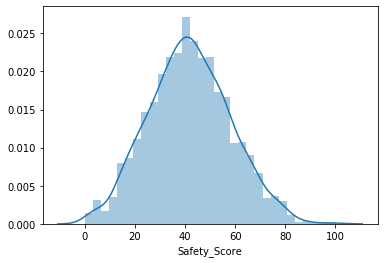

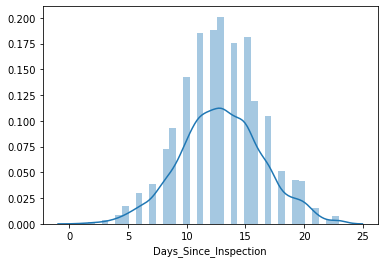

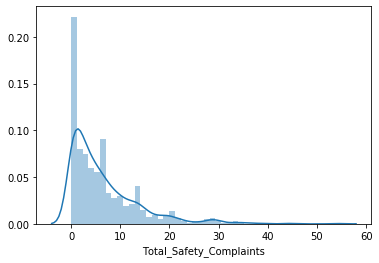

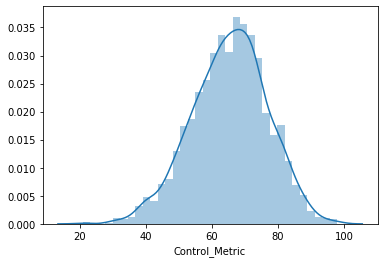

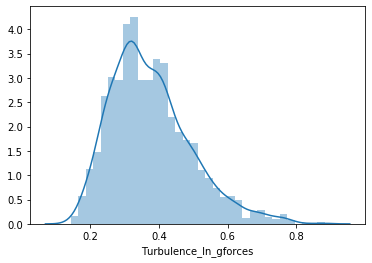

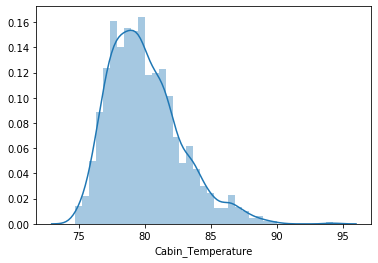

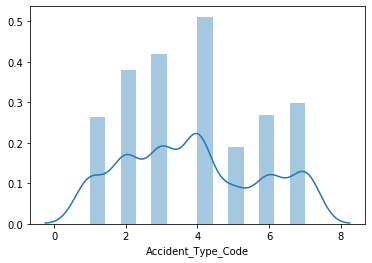

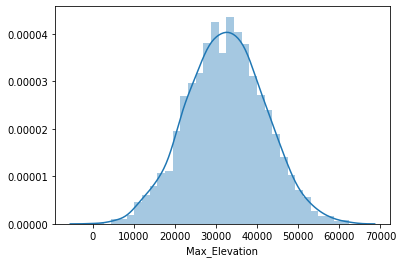

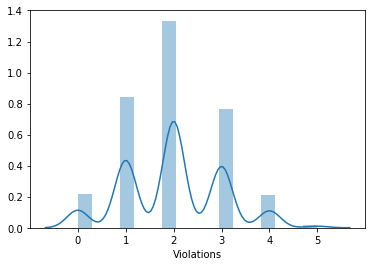

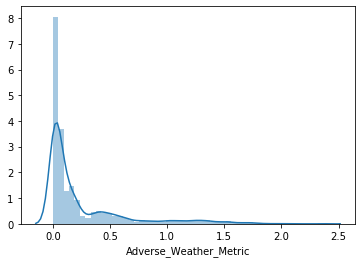

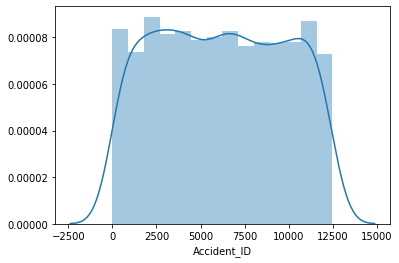

In [0]:
for i in test_data.columns :
  if test_data.dtypes[i] != 'object' :
    sns.distplot(test_data[i])
    plt.show()
  else : 
    continue

In [0]:
test_data['Accident_ID'] = test_data['Accident_ID'].astype('object')

In [0]:
test_data['Accident_Type_Code'] = test_data['Accident_Type_Code'].astype('object')

In [0]:
test_data['Adverse_Weather_Metric'] = test_data['Adverse_Weather_Metric'].apply(lambda x: -np.log(x))

In [0]:
test_data_final=pd.get_dummies(data = test_data,columns=['Accident_Type_Code']).drop(columns=['Accident_Type_Code_1'])

In [0]:
test_data_final

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,Accident_Type_Code_2,Accident_Type_Code_3,Accident_Type_Code_4,Accident_Type_Code_5,Accident_Type_Code_6,Accident_Type_Code_7
Accident_ID,,,,,,,,,,,,,,,,
1,19.497717,16,6,72.151322,0.388959,78.32,37949.724386,2,2.663663,1,0,0,1,0,0,0
10,58.173516,15,3,64.585232,0.250841,78.60,30194.805567,2,5.886240,10,0,0,0,0,0,1
14,33.287671,15,3,64.721969,0.336669,86.96,17572.925484,1,5.445335,14,0,0,0,0,1,0
17,3.287671,21,5,66.362808,0.421775,80.86,40209.186341,2,1.609486,17,0,1,0,0,0,0
21,10.867580,18,2,56.107566,0.313228,79.22,35495.525408,2,0.726299,21,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12484,68.127854,8,11,49.680948,0.470819,77.80,48251.586622,2,0.416444,12484,1,0,0,0,0,0
12487,54.840183,9,9,71.194166,0.417087,79.77,20761.984416,1,5.296360,12487,0,0,0,0,1,0
12488,36.712329,14,10,91.203282,0.313950,83.96,36676.100601,2,4.752632,12488,0,0,0,0,1,0


In [0]:
PREDICTED_CLASSES1 = model.predict_classes(preprocessing.scale(test_data_final.drop(columns=['Accident_ID'])))

In [0]:
test_data_final.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Max_Elevation', 'Violations', 'Adverse_Weather_Metric', 'Accident_ID',
       'Accident_Type_Code_2', 'Accident_Type_Code_3', 'Accident_Type_Code_4',
       'Accident_Type_Code_5', 'Accident_Type_Code_6', 'Accident_Type_Code_7'],
      dtype='object')

In [0]:
train_data_final.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric', 'Accident_ID', 'Accident_Type_Code_1',
       'Accident_Type_Code_2', 'Accident_Type_Code_3', 'Accident_Type_Code_4',
       'Accident_Type_Code_5', 'Accident_Type_Code_6', 'Accident_Type_Code_7'],
      dtype='object')

In [0]:
p=pd.Series(encoder.inverse_transform(PREDICTED_CLASSES1))

In [0]:
p.index=test_data.index

In [0]:
pd.DataFrame(p, columns=['Severity'])

,Severity
Accident_ID,
1,Highly_Fatal_And_Damaging
10,Significant_Damage_And_Fatalities
14,Significant_Damage_And_Serious_Injuries
17,Highly_Fatal_And_Damaging
21,Significant_Damage_And_Fatalities
...,...
12484,Highly_Fatal_And_Damaging
12487,Significant_Damage_And_Serious_Injuries
12488,Significant_Damage_And_Serious_Injuries


In [0]:
pd.DataFrame(p, columns=['Severity']).to_csv('submission.csv')